# Extended Erlang C (M/M/c/K+M model)

This is an Erlang C model with impatient clients.

## Importing modules

In [5]:
# Erlang module
from queuesim.analytic import erlang_c_ext_table

# Plotting modules
import matplotlib.pyplot as plt
import matplotlib.ticker as formater
import seaborn as sns

# Defining general plot style
sns.set()
percent_formater = formater.PercentFormatter(xmax=1, decimals=0)

## Mean waiting time as a function of &rho;

In [6]:
# Arrival rate range
l_range = [1 / mean_i for mean_i in range(40, 75, 2)]

# Service rate
mu = 1 / 600

# Waiting cancelation rate
nu = 1 / 900

# Number of operators
c = 10

# System size
K = 20

# Erlang C results for different values of lambda
results = erlang_c_ext_table([(l, mu, nu, c, K) for l in l_range])

# Display results table
results

,lambda,mu,nu,a,c,K,rho_offered,rho_real,P(blocked),P(A),E[N_Q],E[N],E[W],E[V]
0,0.025000,0.001667,0.001111,15.000000,10,10,1.500000,0.990567,0.093936,0.245686,5.527938,15.433612,221.117501,617.344480
1,0.023810,0.001667,0.001111,14.285714,10,10,1.428571,0.986145,0.074228,0.235471,5.045798,14.907245,211.923524,626.104299
2,0.022727,0.001667,0.001111,13.636364,10,10,1.363636,0.980407,0.057849,0.223185,4.565157,14.369230,200.866901,632.246130
3,0.021739,0.001667,0.001111,13.043478,10,10,1.304348,0.973246,0.044505,0.209340,4.095784,13.828240,188.406086,636.099019
4,0.020833,0.001667,0.001111,12.500000,10,10,1.250000,0.964613,0.033838,0.194472,3.646344,13.292474,175.024500,638.038749
5,0.020000,0.001667,0.001111,12.000000,10,10,1.200000,0.954530,0.025460,0.179098,3.223770,12.769071,161.188509,638.453569
6,0.019231,0.001667,0.001111,11.538462,10,10,1.153846,0.943078,0.018984,0.163682,2.832960,12.263737,147.313923,637.714312
7,0.018519,0.001667,0.001111,11.111111,10,10,1.111111,0.930385,0.014048,0.148605,2.476755,11.780606,133.744791,636.152738
8,0.017857,0.001667,0.001111,10.714286,10,10,1.071429,0.916615,0.010332,0.134161,2.156156,11.322309,120.744762,634.049301
9,0.017241,0.001667,0.001111,10.344828,10,10,1.034483,0.901949,0.007562,0.120554,1.870668,10.890161,108.498762,631.629311


In [7]:
# Optional: Interactive diagram mode
# Run "pip install ipympl" first
# %matplotlib ipympl

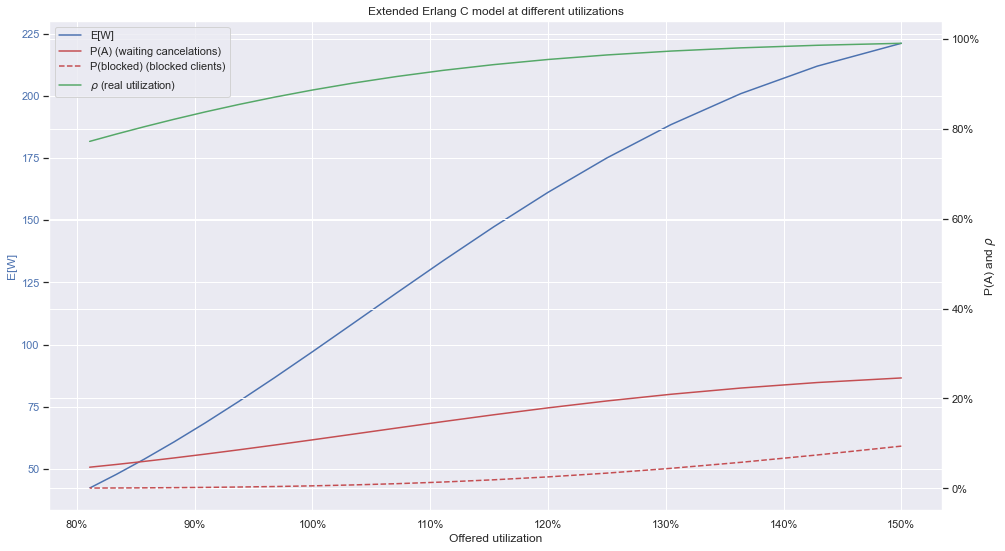

In [8]:
fig, ax = plt.subplots(figsize=(16, 9))

line1 = ax.plot(results["rho_offered"], results["E[W]"], 'b', label="E[W]")
ax.tick_params(axis='y', labelcolor='b')
ax.set_xlabel("Offered utilization")
ax.set_ylabel("E[W]", color='b')
ax.xaxis.set_major_formatter(percent_formater)
lines1, labels1 = ax.get_legend_handles_labels()

ax = ax.twinx()
line2 = ax.plot(results["rho_offered"], results["P(A)"], 'r', label="P(A) (waiting cancelations)")
line3 = ax.plot(results["rho_offered"], results["P(blocked)"], 'r--', label="P(blocked) (blocked clients)")
line4 = ax.plot(results["rho_offered"], results["rho_real"], 'g', label="$\\rho$ (real utilization)")
ax.set_ylabel("P(A) and $\\rho$")
ax.yaxis.set_major_formatter(percent_formater)
lines2, labels2 = ax.get_legend_handles_labels()

ax.set_title("Extended Erlang C model at different utilizations")
ax.legend(lines1 + lines2, labels1 + labels2)